# Описание проекта

В нашем распоряжении данные сервиса аренды самокатов GoFast: данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

  
Сервисом можно пользоваться:
 - без подписки: абонентская плата отсутствует; стоимость одной минуты поездки — 8 рублей; стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra: абонентская плата — 199 рублей в месяц; стоимость одной минуты поездки — 6 рублей; стоимость старта — бесплатно.
    
<b>В основных данных есть информация о пользователях, их поездках и подписках. </b>

  Пользователи — users_go.csv
    
    user_id	- уникальный идентификатор пользователя
    name -	имя пользователя
    age	- возраст
    city -	город
    subscription_type	- тип подписки (free, ultra)
    
  Поездки — rides_go.csv
    
    user_id -	уникальный идентификатор пользователя
    distance -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
    duration -	продолжительность сессии (в минутах) — время с того момента,
    как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    date	- дата совершения поездки

  Подписки — subscriptions_go.csv
    
    subscription_type -	тип подписки
    minute_price -	стоимость одной минуты поездки по данной подписке
    start_ride_price -	стоимость начала поездки
    subscription_fee -	стоимость ежемесячного платежа


In [1]:
# Импортируем базы данных, которые пригодятся в нашем исследование
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

#### Шаг 1. Загрузка данных

**CSV-файлы с данными**

 - Пользователи — users_go.csv
 - Поездки — rides_go.csv
 - Подписки — subscriptions_go.csv

In [2]:
# Прочитаем файлы и сохраним в датафреймы
users_data = pd.read_csv('/datasets/users_go.csv')
rides_data = pd.read_csv('/datasets/rides_go.csv')
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
# Посмотрим основную информацию датафрейма users_data
display(users_data.head(), users_data.info(), users_data.describe().round(2))
# Смотрим кол-во дубликатов
print('Кол-во дубликатов', users_data.duplicated().sum())
# Проверим кол-во пропусков в столбцах датафрейма
print('Кол-во пропусков в столбцах', '\n', users_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra

None

user_id      age
count  1565.00  1565.00
mean    762.63    24.92
std     443.26     4.55
min       1.00    12.00
25%     378.00    22.00
50%     762.00    25.00
75%    1146.00    28.00
max    1534.00    43.00

Кол-во дубликатов 31
Кол-во пропусков в столбцах 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


В нашем датафрейме 1565 строк, из них 31 строка-дубликат, столбцы названы граматно, пропусков в столбцах нет, в столбцах id и возраст целочисленный тип.

In [4]:
# Посмотрим основную информацию датафрейма rides_data
display(rides_data.head(), rides_data.info(), rides_data.describe().round(2))
# Смотрим кол-во дубликатов
print('Кол-во дубликатов', rides_data.duplicated().sum())
# Проверим кол-во пропусков в столбцах датафрейма
print('Кол-во пропусков в столбцах', '\n', rides_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28

None

user_id  distance  duration
count  18068.00  18068.00  18068.00
mean     842.87   3070.66     17.81
std      434.73   1116.83      6.09
min        1.00      0.86      0.50
25%      487.00   2543.23     13.60
50%      889.00   3133.61     17.68
75%     1213.25   3776.22     21.72
max     1534.00   7211.01     40.82

Кол-во дубликатов 0
Кол-во пропусков в столбцах 
 user_id     0
distance    0
duration    0
date        0
dtype: int64


В нашем датафрейме 18068 строк, дубликаты остуствуют, столбцы названы граматно, пропусков в столбцах нет, в столбце id 1534 уникальных значения, как и в датафрейме users_data. Средняя продолжительность сессии поездки близка к медианой. Мединое значение дистанции больше средней на 63 метра. Тип данных в столбце date в дальнейшем заменим типу "даты"

In [5]:
# Посмотрим основную информацию датафрейма subscriptions_data
display(subscriptions_data.head(), subscriptions_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199

None

В данном датафрейме 2 строки с информацией о типе подписки: free или ultra. Для каждого типа есть стоимость минуты, стоимость начала поездки, стоимость подписки. Тип данных в столбцах корректный.

#### Шаг 2. Предобработка данных

In [6]:
# Посмотрим на дубликаты датафрейма users_data
print(users_data[users_data.duplicated()].sample(10))

      user_id        name  age            city subscription_type
1557      611    Владимир   28            Омск             ultra
1556      422      Кирилл   27            Сочи             ultra
1536      909  Константин   20    Екатеринбург              free
1542      204      Руслан   30       Пятигорск             ultra
1545      807   Александр   28    Екатеринбург              free
1541      659       Злата   27  Ростов-на-Дону             ultra
1553      121       Алина   25       Пятигорск             ultra
1559      209      Андрей   23            Омск             ultra
1552      297        Егор   33       Пятигорск             ultra
1561      809        Юрий   26            Сочи              free


In [7]:
# Удалим дубликаты в users_data
users_data = users_data.drop_duplicates().reset_index(drop=True)
users_data.duplicated().sum()

0

In [8]:
# Приведим столбец rides_data к типу даты pandas.
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
# Посмотрим за какие года у нас данные, для корректного отражения месяцов
rides_data['date'].dt.year.unique()

array([2021])

In [10]:
# Создадим новый столбец с номером месяца на основе столбца rides_data.
rides_data['month'] = pd.DatetimeIndex(rides_data['date']).month
rides_data.head()

user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8

Удалили дубликаты в users_data (кол-во строк стало равно кол-ву уникальных значений id). В датафрейме rides_data добавили столбце отображения месяца, а столбец date изменили с типа "объект" на тип "дата".

#### Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках:**

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


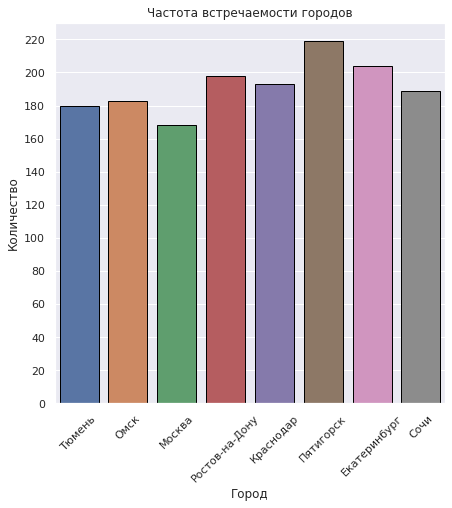

In [11]:
# частота встречаемости городов

# Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(users_data['city'].describe())
print('')

# Посмотрим на кол-во встречаемости каждого города
print(users_data['city'].value_counts())

# Построим столбчатый график
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(data=users_data, x='city', ec='black')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0,221,20))
plt.show()

Больше всего самокатами пользуются в Пятигорске, 219 уникальных пользователей. На втором месте - Екатеренбург с 204 пользователями, с небольшим отставанием дальше расположился Ростов-на-Дону. На последнем месте Москва, 168 упоминаний. Возможно это связано с городской архитектурой, что транспортная доступность в Москве лушче, поэтому необходимость использовать самокаты меньше.

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

free     835
ultra    699
Name: subscription_type, dtype: int64


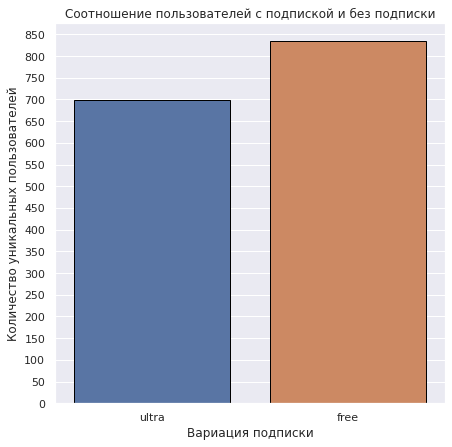

Соотношение пользователей без подписки по отношению к тем, у кого есть подписка: 1.19


In [12]:
# Соотношение пользователей с подпиской и без подписки

# Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(users_data['subscription_type'].describe())
print('')

# Посмотрим на кол-во пользователей с подпиской и без подписки
print(users_data['subscription_type'].value_counts())

# Построим столбчатый график
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(data=users_data, x='subscription_type', ec='black')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Вариация подписки')
plt.ylabel('Количество уникальных пользователей')
plt.yticks(ticks=np.arange(0,900,50))
plt.show()

# Посмотрим процентное соотношение
print('Соотношение пользователей без подписки по отношению к тем, у кого есть подписка:', 
      round(len(users_data.query('subscription_type == "free"')) / len(users_data.query('subscription_type == "ultra"')),2))

Доля пользователей без подписки на 19 процентов больше, чем с подпиской: 835 пользователя против 699

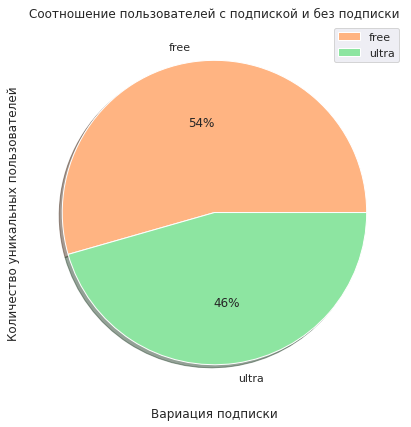

Соотношение категорий: без подписки - 0.54 
 С подпиской: 0.46


In [13]:
# Строим круговую диаграмму
colors = sns.color_palette('pastel')[1:5]
users_data.groupby(['subscription_type']).count().plot(kind='pie', y='user_id', 
  autopct='%1.0f%%', colors=colors, shadow=True)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Вариация подписки')
plt.ylabel('Количество уникальных пользователей')
plt.show()

# Смотрим соотношение
print('Соотношение категорий: без подписки -', 
     round(len(users_data.query('subscription_type == "free"')) / users_data['user_id'].nunique(),2), '\n',
     'С подпиской:', round(len(users_data.query('subscription_type == "ultra"')) / users_data['user_id'].nunique(),2))

По граффику мы видим преобладание пользователей без подписки: Соотношение ultra от общего числа - 46%, free - 54%

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64


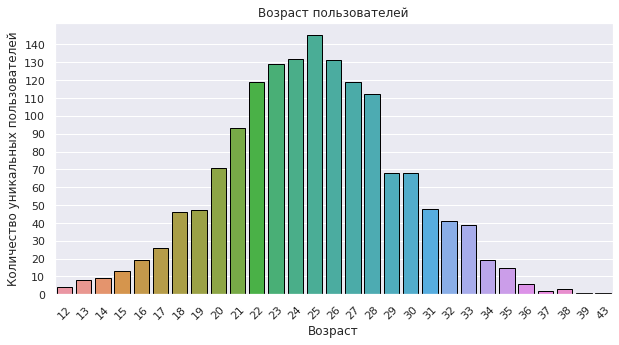

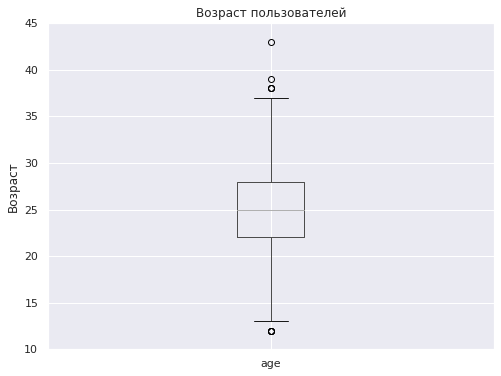

In [14]:
# возраст пользователей

# Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(users_data['age'].describe())
print('')

# Посмотрим на кол-во встречаемости каждого города
print(users_data['age'].value_counts())

# Построим столбчатый график и график размаха
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data=users_data, x='age', ec='black')
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0,150,10))
plt.show()
users_data.boxplot(column = 'age', figsize=(8,6))
plt.title('Возраст пользователей')
plt.ylabel('Возраст')
plt.ylim(10, 45) 
plt.show()

Медианое значение возраста совпадает со средним и равняется 25 лет. Пользователей с таким возрастом 145 человек. Первая и третья квартили - значения в 22 и 28 лет соответсвенно. Основное часть возраста расположилась в диапозоне 13 - 36 лет. Кол-во пользователей с возрастом 12, 74, 38, 39, 43 лет - единицы.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


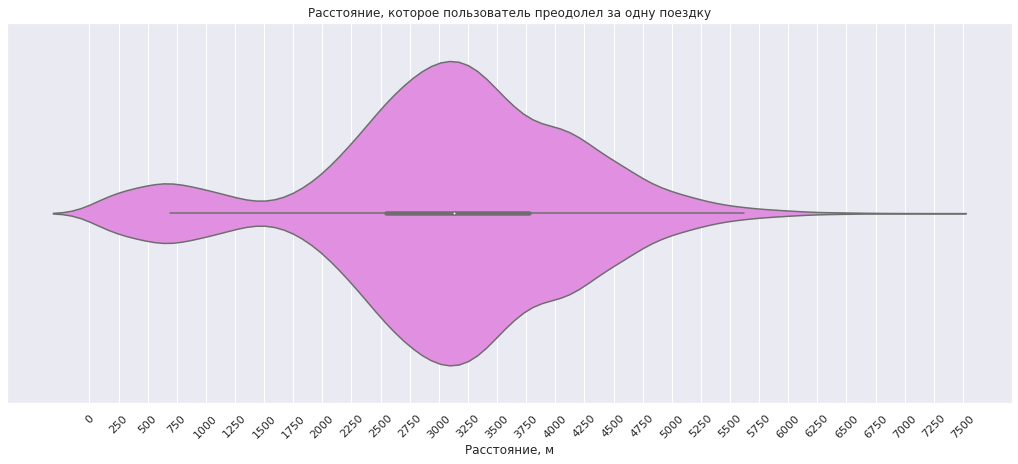

In [16]:
# Расстояние, которое пользователь преодолел за одну поездку

# Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(rides_data['distance'].describe())

# Построим график типа "виолончельный ключ", на котором мы видим и гисстограмное распределение и диапозон размаха
sns.set(rc={'figure.figsize':(18,7)})
sns.violinplot(data=rides_data, x='distance', ec='black', color='violet')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, м')
plt.xticks(ticks=np.arange(0,7550,250), rotation=45)
plt.show()

В основном пользователи проезжают от 2300 до 4000 метров. Средняя дистанция за одну поездку 3070 метров. Мединое значение дистанции больше средней на 63 метра. В целом диапозон дистанции, которую пользователь проезжает за раз, от 650 до 5600 метров. Расстояние, выходящее из данных рамок, редкое, его можно считать аномальным. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката, и оно почти равно медианому значению.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


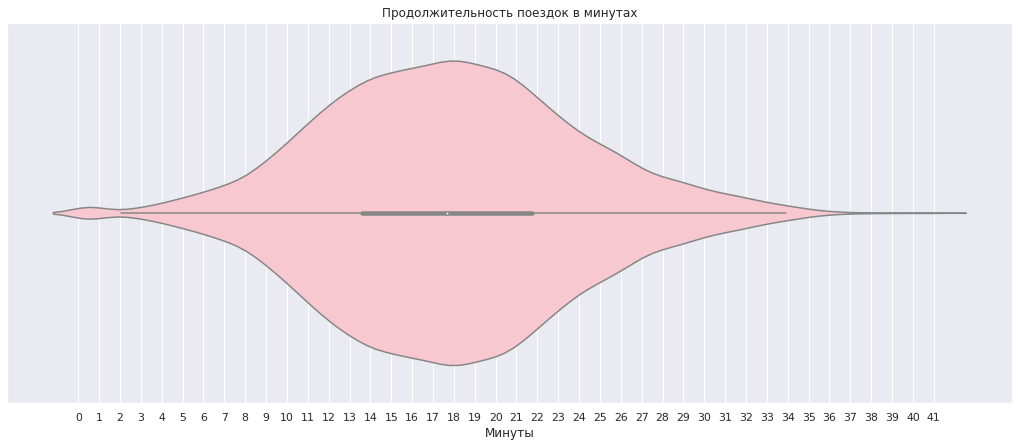

In [17]:
# Продолжительность поездок

# Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(rides_data['duration'].describe())

# Построим график типа "виолончельный ключ", на котором мы видим и гисстограмное распределение и диапозон размаха
sns.set(rc={'figure.figsize':(18,7)})
sns.violinplot(data=rides_data, x='duration', ec='black', color='pink')
plt.title('Продолжительность поездок в минутах')
plt.xlabel('Минуты')
plt.xticks(ticks=np.arange(0,42,1), rotation=1)
plt.show()

Основое время продолжительности поездки от 10 до 26 минут. Хорошее время, что бы доехать не в прогулочном режиме от метро/остановки до пункта названчения (дом/работа/какое-то заведение). Медиана совпадает со средним значением и равно примерно 17 минут. "Усы" размаха времени от 2 до 34 минут. Время меньше 2 минут - скорее всего за это период пользователь обнаруживал какие-то технические проблемы с самокатом.

#### Шаг 4. Объединение данных

In [18]:
# Объединим данные о пользователях, поездках и подписках в один датафрейм.

# Для объединения воспользуемся методом merge(), название столбца, по которому объединять, передадим в параметре "on",
# а параметр "outer", объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов
users_rides_data = users_data.merge(rides_data, on='user_id', how='outer')
display(users_rides_data.sample(5))

# добавляем третий датафрей
data = users_rides_data.merge(subscriptions_data, on='subscription_type', how='outer')
display(data.sample(5))

user_id       name  age            city subscription_type     distance  \
15375     1344   Стефания   21          Тюмень              free  3562.100553   
8729       867     Леонид   24  Ростов-на-Дону              free  3191.293478   
381         40     Ильдар   21  Ростов-на-Дону             ultra  2886.261311   
472         51       Алла   31  Ростов-на-Дону             ultra  3350.107786   
3934       424  Александр   28            Омск             ultra  2589.461265   

        duration       date  month  
15375  20.357877 2021-10-08     10  
8729   19.382587 2021-06-17      6  
381    19.369691 2021-12-02     12  
472    15.823910 2021-06-27      6  
3934   18.214707 2021-03-11      3

user_id       name  age            city subscription_type     distance  \
16262     1407      Борис   26       Пятигорск              free    84.155601   
8367       838  Владислав   23  Ростов-на-Дону              free  1961.861034   
1841       198    Марсель   27            Сочи             ultra  3688.898179   
15599     1362   Владимир   24    Екатеринбург              free  3039.758134   
14223     1259   Ярослава   26          Москва              free  2804.315445   

        duration       date  month  minute_price  start_ride_price  \
16262   7.201973 2021-12-28     12             8                50   
8367   13.701060 2021-08-04      8             8                50   
1841   12.197552 2021-12-17     12             6                 0   
15599  22.027535 2021-01-30      1             8                50   
14223  16.010789 2021-09-07      9             8                50   

       subscription_fee  
16262                 0  
8367                  0  
1841                199  
15599                 0  
14223                 0

In [19]:
# Для удобства переименуем кол-вы показания месяца в наименования
# Создаем функцию
def month_name(month):
    if month == 1:
        return '01 (January)'
    if month == 2:
        return '02 (February)'
    if month == 3:
        return '03 (March)'
    if month == 4:
        return '04 (April)'
    if month == 5:
        return '05 (May)'
    if month == 6:
        return '06 (June)'
    if month == 7:
        return '07 (July)'
    if month == 8:
        return '08 (August)'
    if month == 9:
        return '09 (September)'
    if month == 10:
        return '10 (October)'
    if month == 11:
        return '11 (November)'
    if month == 12:
        return '12 (December)'
    
# Применяем функцию к столбцу
data['month'] = data['month'].apply(month_name)

In [20]:
# Посмотрим основную информацию нового датафрейма 
display(data.info(), data.describe().round(2))
# Смотрим кол-во дубликатов
print('Кол-во дубликатов', data.duplicated().sum())
# Проверим кол-во пропусков в столбцах датафрейма
print('Кол-во пропусков в столбцах\n', data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.8+ MB


None

user_id       age  distance  duration  minute_price  start_ride_price  \
count  18068.00  18068.00  18068.00  18068.00      18068.00          18068.00   
mean     842.87     24.89   3070.66     17.81          7.28             32.01   
std      434.73      4.58   1116.83      6.09          0.96             24.00   
min        1.00     12.00      0.86      0.50          6.00              0.00   
25%      487.00     22.00   2543.23     13.60          6.00              0.00   
50%      889.00     25.00   3133.61     17.68          8.00             50.00   
75%     1213.25     28.00   3776.22     21.72          8.00             50.00   
max     1534.00     43.00   7211.01     40.82          8.00             50.00   

       subscription_fee  
count          18068.00  
mean              71.59  
std               95.51  
min                0.00  
25%                0.00  
50%                0.00  
75%              199.00  
max              199.00

Кол-во дубликатов 0
Кол-во пропусков в столбцах
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Создадим ещё два датафрейма:**
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской.
 
И визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

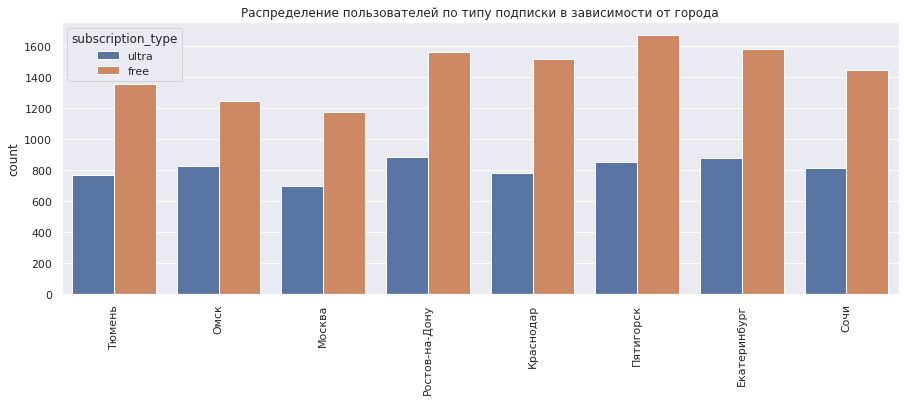

In [21]:
# Посмотрим на распределение подписки (с/без) по городам
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='city', hue='subscription_type')
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Распределение пользователей по типу подписки в зависимости от города')
plt.show()

Как видим преобладает количество пользователей без подписки, к примеру в Пятигорске такое знаение превышает тех у кого подписка есть в 2 раза. В среднем "подписчиков" от 700 до 900 человек в зависимости от города.

In [22]:
# Создаем датафрей для пользователей без подписки
data_free = data.query('subscription_type == "free"')

# Смотрим как все склеилось
data_free.sample(10)

user_id       name  age          city subscription_type     distance  \
17073     1464     Зарина   15          Омск              free  2260.021834   
12459     1136  Валентина   27        Тюмень              free  3459.533651   
10875     1020    Камилла   32        Москва              free  3030.699659   
13177     1188      Захар   22          Омск              free  5494.799099   
15316     1340       Влад   32     Краснодар              free  2795.985738   
8974       885     Ильдар   28  Екатеринбург              free   546.230211   
6643       709      Диана   25  Екатеринбург              free  3375.776871   
7934       804   Тамерлан   24     Пятигорск              free  3649.737078   
11161     1040  Валентина   25  Екатеринбург              free    90.914040   
15973     1387      Борис   27        Москва              free  2140.162623   

        duration       date           month  minute_price  start_ride_price  \
17073  15.327392 2021-12-27   12 (December)             8                50   
12459  11.983539 2021-01-11    01 (January)             8                50   
10875  12.659142 2021-03-26      03 (March)             8                50   
13177  18.334259 2021-09-28  09 (September)             8                50   
15316  21.625416 2021-04-15      04 (April)             8                50   
8974   12.365576 2021-04-24      04 (April)             8                50   
6643   12.790254 2021-10-17    10 (October)             8                50   
7934   16.299474 2021-08-04     08 (August)             8                50   
11161   5.320873 2021-11-02   11 (November)             8                50   
15973  21.560650 2021-09-12  09 (September)             8                50   

       subscription_fee  
17073                 0  
12459                 0  
10875                 0  
13177                 0  
15316                 0  
8974                  0  
6643                  0  
7934                  0  
11161                 0  
15973                 0

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


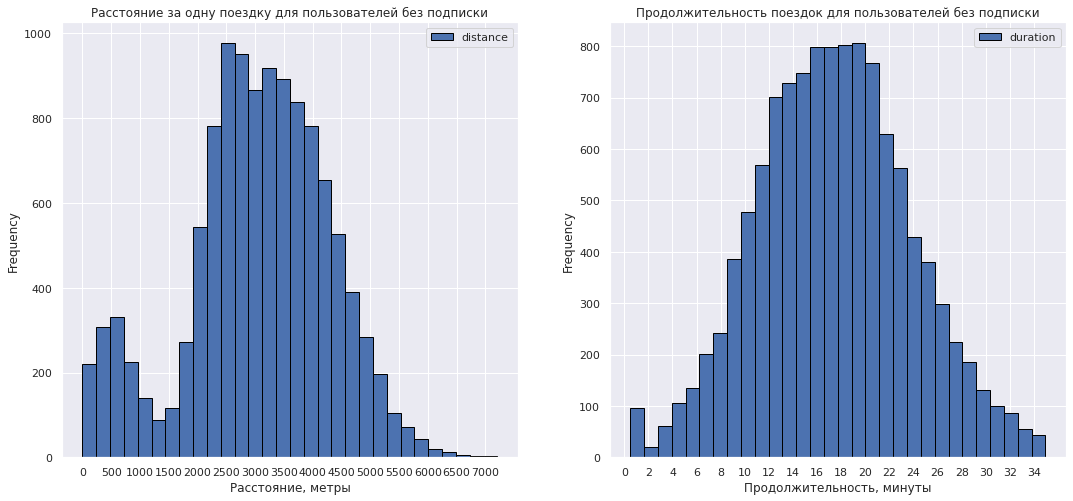

In [23]:
# Смотрим на статистические данные столбца, которые дают представление о распределение значений
print(data_free['distance'].describe())
print('')
print(data_free['duration'].describe())

# Построим графики гисстограмного распределения и диапозона размаха
fig, axes = plt.subplots(1,2)
axes[0].set_title('Расстояние за одну поездку для пользователей без подписки')
axes[1].set_title('Продолжительность поездок для пользователей без подписки')
axes[0].set_ylabel('Кол-во поездок')
axes[0].set_xlabel('Расстояние, метры')
axes[1].set_xlabel('Продолжительность, минуты')
axes[0].set_xticks(ticks=np.arange(0,7500,500))
axes[1].set_xticks(ticks=np.arange(0,35,2))
data_free['distance'].plot.hist(ax=axes[0], bins=30, ec='black', legend=True, figsize=(18, 8))
data_free['duration'].plot.hist(ax=axes[1], bins=30, ec='black', legend=True, figsize=(18, 8))
plt.show()

Для пользователей без подписки характерны следующие заключения: Средняя дистанция поездки - 3114 метров, а среднее время - 17 минут. Чаще всего самокат берут для поездки от 2000 до 4500 метров и по времени от 9 до 25 минут. Так же заметен не очень большой диапозон коротких поездок в районе 500 м. Среднее время совпадает с медианой времени.

In [24]:
# Создаем датафрей для пользователей с подпиской
data_ultra = data.query('subscription_type == "ultra"')

# Смотрим как все склеилось
data_ultra.sample(10)

user_id     name  age       city subscription_type     distance  \
3591      386   Ульяна   22     Тюмень             ultra  3250.632581   
6099      654   Самира   26  Пятигорск             ultra  3620.780932   
4987      537   Гордей   23       Сочи             ultra  3425.868201   
2040      220  Тимофей   31       Омск             ultra  3101.917217   
2799      299    Агата   19       Омск             ultra  3259.670414   
1120      120   Рамиль   26  Пятигорск             ultra  2390.381537   
57          5    Адель   28       Омск             ultra  3311.974724   
1016      109     Марк   27  Краснодар             ultra  4196.978397   
5419      578    Айдар   25       Сочи             ultra  2447.275381   
2791      297     Егор   33  Пятигорск             ultra  3330.037660   

       duration       date          month  minute_price  start_ride_price  \
3591  17.265156 2021-05-09       05 (May)             6                 0   
6099  17.577928 2021-06-18      06 (June)             6                 0   
4987  11.341146 2021-01-15   01 (January)             6                 0   
2040  17.339724 2021-03-28     03 (March)             6                 0   
2799  21.313344 2021-01-24   01 (January)             6                 0   
1120  15.963931 2021-04-09     04 (April)             6                 0   
57    11.948739 2021-07-24      07 (July)             6                 0   
1016  17.991367 2021-04-24     04 (April)             6                 0   
5419  17.488323 2021-12-30  12 (December)             6                 0   
2791  23.271590 2021-12-09  12 (December)             6                 0   

      subscription_fee  
3591               199  
6099               199  
4987               199  
2040               199  
2799               199  
1120               199  
57                 199  
1016               199  
5419               199  
2791               199

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


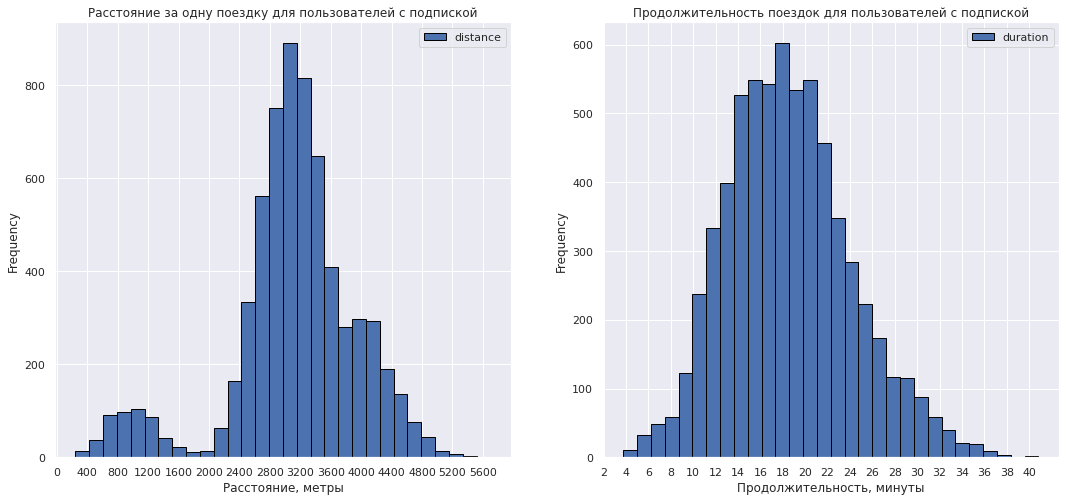

In [25]:
# Смотрим на статистические данные столбца, которые дают представление о распределение значений
print(data_ultra['distance'].describe())
print('')
print(data_ultra['duration'].describe())

# Построим графики гисстограмного распределения и диапозона размаха
fig, axes = plt.subplots(1,2)
axes[0].set_title('Расстояние за одну поездку для пользователей с подпиской')
axes[1].set_title('Продолжительность поездок для пользователей с подпиской')
axes[0].set_ylabel('Кол-во поездок')
axes[0].set_xlabel('Расстояние, метры')
axes[1].set_xlabel('Продолжительность, минуты')
axes[0].set_xticks(ticks=np.arange(0,6001,400))
axes[1].set_xticks(ticks=np.arange(0,42,2))
data_ultra['distance'].plot.hist(ax=axes[0], bins=30, ec='black', legend=True, figsize=(18, 8))
data_ultra['duration'].plot.hist(ax=axes[1], bins=30, ec='black', legend=True, figsize=(18, 8))
plt.show()

Как можем заметить, пользователи с подпиской не берут самокаты для коротких поездок: основная дистанция от 2400 до 4200 метров, при этом средняя дистанция стремится к мединой со значением 3145 метра. Относительно времени - среднее значение совпадает с медианой, примерно 18 с половиной минут. Основной дипозон времени от 10 до 26 минут.

**Заключение**

Пик дистанции более выражену пользователей с подпиской, чем у клиентов без подписки. Так же часть категории людей без подписки пользуется самокатом на короткие поездки, возможно это те, кто впервые взял самокат, так сказать на пробу. Но при этом и общий диапозон у пользоватлей без подписки шире. Левая и правая квантили дальше удалены на 400 м в отличии от "подписчиков", и встречаются разовые поездки на дистанцию в 7 км.

Время поездки у "подписчиков" в среднем на 1 минуту дольше, да и общий диапозон времени на ту же минуту дольше. Так же отсутсвует значения 3,5 минут, в отличие от пользоватлей без подписки. Скорее всего есть клиенты, которые впервые пользуются самокатом и не разобрались что к чему, поэтому и завершали в течение минуты двух поездку.

#### Шаг 5. Подсчёт выручки

**Создадим датафрейм с агрегированными данными о поездках для каждого пользователя за каждый месяц:** 
 - суммарное расстояние, 
 - количество поездок,
 - суммарное время.


In [26]:
# Продолжительность каждой поездки округлим с помощью метода «потолок» библиотеки numpy
data['duration'] = np.ceil(data['duration'])
data['duration'].sample(5)

16268    24.0
11191    24.0
17721    15.0
3855     19.0
2260     15.0
Name: duration, dtype: float64

In [27]:
# Формируем сводную таблицу по уникальному пользовательскому id и каждому месяцу, значением будет суммарное растояние и время,
# а так же количественные значения
data_pivot = data.pivot_table(index=['user_id', 'month', 'subscription_type'],
            values=['distance', 'duration'], aggfunc=['sum', 'count'])

# Избавляемся от первого уровня названия колонок с переносом значений на 2 уровень
data_pivot.columns = ['_'.join(str(s). strip () for s in col if s) for col in data_pivot.columns]

# Переименовываем столбец "кол-во дистанций" для более удобного понимания
data_pivot = data_pivot.rename(columns={'count_distance': 'number_of_trips'})

# И удаляем один лишний столбец "кол-во промежутков времени", т.к. столбец "кол-во дистанций" дублирует эти значение 
data_pivot = data_pivot.loc[:, 'sum_distance':'number_of_trips']

# Смотрим, что получилось
data_pivot.tail(20)

sum_distance  sum_duration  \
user_id month          subscription_type                               
1532    08 (August)    free                8774.460732          47.0   
        10 (October)   free                2891.115711          21.0   
        11 (November)  free                8627.494480          60.0   
        12 (December)  free                6111.889853          42.0   
1533    01 (January)   free                3438.600356          21.0   
        02 (February)  free                 310.488247          11.0   
        03 (March)     free               12822.696276          93.0   
        04 (April)     free                2514.498956          18.0   
        06 (June)      free                1034.998188           7.0   
        07 (July)      free                8772.518529          48.0   
        08 (August)    free                4581.943632          22.0   
        11 (November)  free                3414.448028          26.0   
1534    01 (January)   free                4678.415899          16.0   
        02 (February)  free                2103.914120          14.0   
        04 (April)     free                3434.290912          15.0   
        06 (June)      free                3409.468534          26.0   
        08 (August)    free                7622.453034          48.0   
        09 (September) free                4928.173852          23.0   
        11 (November)  free               13350.015305          78.0   
        12 (December)  free                2371.711192          16.0   

                                          number_of_trips  
user_id month          subscription_type                   
1532    08 (August)    free                             2  
        10 (October)   free                             1  
        11 (November)  free                             4  
        12 (December)  free                             2  
1533    01 (January)   free                             1  
        02 (February)  free                             1  
        03 (March)     free                             4  
        04 (April)     free                             1  
        06 (June)      free                             1  
        07 (July)      free                             3  
        08 (August)    free                             1  
        11 (November)  free                             1  
1534    01 (January)   free                             1  
        02 (February)  free                             1  
        04 (April)     free                             1  
        06 (June)      free                             2  
        08 (August)    free                             2  
        09 (September) free                             1  
        11 (November)  free                             4  
        12 (December)  free                             1

In [28]:
#  Создадим сводную таблицу с информацией из подписки по каждому клиенту
data_subscription_pivot = data.pivot_table(index=['user_id', 'month', 'subscription_type'],
            values=['minute_price', 'start_ride_price', 'subscription_fee'])
# Смотрим
data_subscription_pivot

minute_price  start_ride_price  \
user_id month          subscription_type                                   
1       01 (January)   ultra                         6                 0   
        04 (April)     ultra                         6                 0   
        08 (August)    ultra                         6                 0   
        10 (October)   ultra                         6                 0   
        11 (November)  ultra                         6                 0   
...                                                ...               ...   
1534    06 (June)      free                          8                50   
        08 (August)    free                          8                50   
        09 (September) free                          8                50   
        11 (November)  free                          8                50   
        12 (December)  free                          8                50   

                                          subscription_fee  
user_id month          subscription_type                    
1       01 (January)   ultra                           199  
        04 (April)     ultra                           199  
        08 (August)    ultra                           199  
        10 (October)   ultra                           199  
        11 (November)  ultra                           199  
...                                                    ...  
1534    06 (June)      free                              0  
        08 (August)    free                              0  
        09 (September) free                              0  
        11 (November)  free                              0  
        12 (December)  free                              0  

[11331 rows x 3 columns]

In [29]:
# Объединяем наши сводные таблицы для полноты картины
# и сбросим индекс month и subscription_type
data_final = data_pivot.join(data_subscription_pivot).reset_index(level=['month', 'subscription_type'])

# Смотрим
data_final

month subscription_type  sum_distance  sum_duration  \
user_id                                                                 
1          01 (January)             ultra   7027.511294          42.0   
1            04 (April)             ultra    754.159807           7.0   
1           08 (August)             ultra   6723.470560          46.0   
1          10 (October)             ultra   5809.911100          32.0   
1         11 (November)             ultra   7003.499363          56.0   
...                 ...               ...           ...           ...   
1534          06 (June)              free   3409.468534          26.0   
1534        08 (August)              free   7622.453034          48.0   
1534     09 (September)              free   4928.173852          23.0   
1534      11 (November)              free  13350.015305          78.0   
1534      12 (December)              free   2371.711192          16.0   

         number_of_trips  minute_price  start_ride_price  subscription_fee  
user_id                                                                     
1                      2             6                 0               199  
1                      1             6                 0               199  
1                      2             6                 0               199  
1                      2             6                 0               199  
1                      3             6                 0               199  
...                  ...           ...               ...               ...  
1534                   2             8                50                 0  
1534                   2             8                50                 0  
1534                   1             8                50                 0  
1534                   4             8                50                 0  
1534                   1             8                50                 0  

[11331 rows x 8 columns]

In [30]:
# Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

# Помесячная выручка считается по формуле: 
# (стоимость старта поездки * количество поездок) + (стоимость одной минуты поездки * общая продолжительность 
# всех поездок в минутах) + стоимость подписки.
data_final['monthly_revenue'] = (
    ((data_final['start_ride_price'] * data_final['number_of_trips']) + 
     (data_final['minute_price'] * data_final['sum_duration'])) + data_final['subscription_fee']
)
# Проверяем
data_final

month subscription_type  sum_distance  sum_duration  \
user_id                                                                 
1          01 (January)             ultra   7027.511294          42.0   
1            04 (April)             ultra    754.159807           7.0   
1           08 (August)             ultra   6723.470560          46.0   
1          10 (October)             ultra   5809.911100          32.0   
1         11 (November)             ultra   7003.499363          56.0   
...                 ...               ...           ...           ...   
1534          06 (June)              free   3409.468534          26.0   
1534        08 (August)              free   7622.453034          48.0   
1534     09 (September)              free   4928.173852          23.0   
1534      11 (November)              free  13350.015305          78.0   
1534      12 (December)              free   2371.711192          16.0   

         number_of_trips  minute_price  start_ride_price  subscription_fee  \
user_id                                                                      
1                      2             6                 0               199   
1                      1             6                 0               199   
1                      2             6                 0               199   
1                      2             6                 0               199   
1                      3             6                 0               199   
...                  ...           ...               ...               ...   
1534                   2             8                50                 0   
1534                   2             8                50                 0   
1534                   1             8                50                 0   
1534                   4             8                50                 0   
1534                   1             8                50                 0   

         monthly_revenue  
user_id                   
1                  451.0  
1                  241.0  
1                  475.0  
1                  391.0  
1                  535.0  
...                  ...  
1534               308.0  
1534               484.0  
1534               234.0  
1534               824.0  
1534               178.0  

[11331 rows x 9 columns]

In [31]:
# Код ревьюера
data_final.groupby('subscription_type')['monthly_revenue'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: monthly_revenue, dtype: float64

In [32]:
# Посмотрим на суммарную зависимость выручки от продолжительностей поездок
fig = px.bar(data_final, x='sum_duration', y='monthly_revenue', hover_data=['number_of_trips', 'sum_distance'],
    title='Суммарная зависимость выручки от продолжительности поездки', color='monthly_revenue', 
    labels={'sum_duration':'Продолжительность поездки, мин', 'monthly_revenue':'Месячная выручка, руб',
            'number_of_trips':'Кол-во поездок', 'sum_distance':'Общая дистанция'})
fig.show()

Основную прибыль приносят поездки продолжительностью от 13 до 44 минут, таких поездок значительно больше, чем длинных.

monthly_revenue  sum_distance  sum_duration  number_of_trips
monthly_revenue         1.000000      0.867285      0.951567         0.874282
sum_distance            0.867285      1.000000      0.896832         0.874057
sum_duration            0.951567      0.896832      1.000000         0.888112
number_of_trips         0.874282      0.874057      0.888112         1.000000

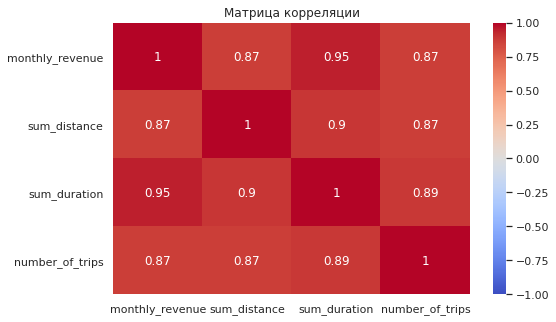

In [33]:
# Воспользуемся методом корреляции и хитмепом
# Нам нужен список с параметрами для проверки
corr_columns = ['monthly_revenue','sum_distance', 'sum_duration', 'number_of_trips']
corr_matrix = data_final[corr_columns].corr()
# выводим матрицу корреляции
display(corr_matrix)

# Визуализируем
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

Как видим, зависимость прямопропорциональная: чем больше какой-либо из параметров, тем больше стоимость. Все параметры выражены положительной линейной связью. 

In [34]:
# Посмотрим на помесячное распределения между категориями подписок по кол-ву поездок и прибыли
data_final_month = data_final.pivot_table(index=['subscription_type', 'month'], values=['number_of_trips',
                'monthly_revenue'], aggfunc='sum').reset_index(level=['month', 'subscription_type'])
data_final_month

subscription_type           month  monthly_revenue  number_of_trips
0               free    01 (January)         193850.0             1001
1               free   02 (February)         165856.0              868
2               free      03 (March)         187214.0              983
3               free      04 (April)         185598.0              955
4               free        05 (May)         188030.0              963
5               free       06 (June)         192144.0              988
6               free       07 (July)         185038.0              955
7               free     08 (August)         187116.0              978
8               free  09 (September)         193700.0             1002
9               free    10 (October)         181428.0              946
10              free   11 (November)         179076.0              926
11              free   12 (December)         195054.0             1003
12             ultra    01 (January)         144108.0              584
13             ultra   02 (February)         124572.0              468
14             ultra      03 (March)         142608.0              561
15             ultra      04 (April)         137318.0              551
16             ultra        05 (May)         149235.0              597
17             ultra       06 (June)         143834.0              565
18             ultra       07 (July)         143466.0              574
19             ultra     08 (August)         138534.0              540
20             ultra  09 (September)         129337.0              515
21             ultra    10 (October)         133932.0              529
22             ultra   11 (November)         126546.0              492
23             ultra   12 (December)         131047.0              524

In [35]:
# Визуализируем кол-во поездок в каждый месяц в зависимости от типа подписки
fig = px.bar(data_final_month, x='month', y='number_of_trips', facet_col='subscription_type', hover_data=['monthly_revenue'],
    title='Кол-во поездок в зависимости от месяца', color='number_of_trips', 
    labels={'month':'', 'monthly_revenue':'Месячная выручка, руб',
            'number_of_trips':'Кол-во поездок', 'subscription_type':'Тип подписки'})
fig.show()

In [36]:
# Визуализируем суммарную прибыль в каждый месяц в зависимости от типа подписки
fig = px.bar(data_final_month, x='month', y='monthly_revenue', facet_col='subscription_type', hover_data=['monthly_revenue'],
    title='Прибыль в зависимости от месяца', color='monthly_revenue', 
    labels={'month':'', 'monthly_revenue':'Месячная выручка, руб',
            'number_of_trips':'Кол-во поездок', 'subscription_type':'Тип подписки'})
fig.show()

Как видим, пользователи без подписки каждый месяц совершают ~1,8 раза больше поездок, и на ~35% приносят выручки компании. А все потому что, кол-во пользоватлей без подписки больше.

**Подвывод**
Мы сгруппировали данными о поездках на основе суммарного расстояния, количества поездок и суммарного времи для каждого пользователя в разбивке по месяцам, а также с основной информацией из условий подписки.
Добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Шаг 6. Проверка гипотез

Посчитаем среднее, дисперсию и стандартное отклонение для всех пользователей в течение всего периода:
Применим цикл, в котором с помощью сводных таблиц раассчитаем необходимые параметры.

In [37]:
for i in range(0, 4):
    functions = ['count', 'mean', np.var, np.std]# функции, которые будем применять к значениям
    tables = ['total_month_sum_mean_count','total_month_sum_mean',
              'total_month_sum_var', 'total_month_sum_std']# названия сводных таблиц
    list_of_cols = ['sum_distance', 'sum_duration', 'number_of_trips', 'monthly_revenue']# значения
    suffix = ['_count','_mean', '_var', '_std']# суффикс, который добавим к именам колонок
    
    tables[i] = data_final.pivot_table(index=['subscription_type'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['sum_distance'+suffix[i], 'sum_duration'+suffix[i],\
                         'number_of_trips'+suffix[i], 'monthly_revenue'+suffix[i]]
    display(tables[i])

sum_distance_count  sum_duration_count  \
subscription_type                                           
free                             6798                6798   
ultra                            4533                4533   

                   number_of_trips_count  monthly_revenue_count  
subscription_type                                                
free                                6798                   6798  
ultra                               4533                   4533

sum_distance_mean  sum_duration_mean  number_of_trips_mean  \
subscription_type                                                               
free                      328.641365           1.701677           5182.449164   
ultra                     362.792191           1.433929           4467.327382   

                   monthly_revenue_mean  
subscription_type                        
free                          30.444690  
ultra                         27.298698

sum_distance_var  sum_duration_var  number_of_trips_var  \
subscription_type                                                            
free                   33807.562697          0.800795         1.023353e+07   
ultra                   7790.310733          0.484877         5.537400e+06   

                   monthly_revenue_var  
subscription_type                       
free                        319.564323  
ultra                       216.397520

sum_distance_std  sum_duration_std  number_of_trips_std  \
subscription_type                                                            
free                     183.868330          0.894871          3198.989334   
ultra                     88.262737          0.696331          2353.168174   

                   monthly_revenue_std  
subscription_type                       
free                         17.876362  
ultra                        14.710456

В среднем пользователи без подписки совершают более длительные поездки по продолжительности. А у пользователей с подпиской средняя дистанция поездок выше.

Объем выборки разный - 6798 против 4533.

Характеристика разброса случайных величин у "free" больше, сослаться на маленькую выборку в данном случае мы не можим, т.к. доля пользователей без подписки на 19 процентов больше, чем с подпиской: 835 пользователя против 699.

***Первая гипотеза***

**Гипотеза:** тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

- Проверяем гипотезу. 
- Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- Нулевая гипотеза H0 - что пользователи с подпиской не тратят больше времени на поездки, время поездки с подпиской меньше или равно времени без подписки
- Альтернативная гипотеза H1 - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

**scipy.stats.ttest_ind(array1, array2, equal_var, alternative)**, equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Т.к. мы знаем, что дисперсии выборок пользователей с подпиской free (0.800795) и ultra (0.484877) различаются, то equal_var зададим как False.

In [38]:
# столько времени тратят пользователи на поездки
ultra_ttest = data[data['subscription_type']=='ultra']['duration']
free_ttest = data[data['subscription_type']=='free']['duration']

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(ultra_ttest, free_ttest, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому мы можем отвергнуть нулевую гипотезу. Можно предположить, что пользователи с подпиской тратят больше времени на поездку.

***Вторая гипотеза***

**Гипотеза:**
Проезжают ли пользователи с подпиской за одну поездку расстояние, не превышающее 3130 метров?
 

- Проверяем гипотезу. 
- Нулевая гипотеза H0 - что пользователи с подпиской проезжают расстояние равное 3130 метров.
- Альтернативная гипотеза H1 - пользователи с подпиской проезжают расстояние, не превышающее 3130 метров

Для проверки односторонней гипотезы о равенстве среднего генеральной совокупности некоторому значению используют метод **scipy.stats.ttest_1samp(a, popmean, alternative)**.

*popmean* (от англ. population mean — «среднее значение генеральной совокупности», буквально «среднее в популяции») — предполагаемое среднее, на равенство которому вы делаете тест.

*alternative* — текстовый параметр, задающий альтернативную гипотезу.
Варианты: 'two-sided', 'less', 'greater' (соответственно, двусторонняя, левосторонняя и правосторонняя H1).

In [39]:
# Расстояние за одну поездку для пользователей ultra
one_distance = data.query('subscription_type == "ultra"')['distance']

optimal_distance = 3130 # Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    one_distance, 
    optimal_distance,
      alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


В зависимости от уровня статистической значимости мы можем отвергнуть или нет нулевую гипотезу. Р-value ~ 0,08, следовательно при альфе больше 8% нулевую гипотезу можно отвергнуть и сделать вывод, что износ самокатов будет оптимальный, т.к. расстояние одной поездки в среднем не превышает 3130 метра. При альфе равном или меньше 8%, нулевую гипотезу отвергнуть не можем. Значения средней дистанции весьма близки, как мы выяснили ранее, средняя дистанция стремится к мединой со значением 3145 метра. Так как общепринятые пороговые значения — 5 % и 1 %, мы будем их придерживаться, и в нашем случае нулевую гипотезу отвергать не будем.

***Третья гипотеза***

**Гипотеза:** будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

- Проверяем гипотезу. 
- Нулевая гипотеза H0 - помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.
- Альтернативная гипотеза H1 - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

**scipy.stats.ttest_ind(array1, array2, equal_var, alternative)**

In [40]:
# Выручка от пользователей за поездки
ultra_revenue = data_final[data_final['subscription_type']=='ultra']['monthly_revenue']
free_revenue = data_final[data_final['subscription_type']=='free']['monthly_revenue']

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(ultra_revenue, free_revenue, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


p-value значительно меньше 1%, следовательно, мы можем отвергнуть нулевую гипотезу и прийти к выводу, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

***Четвертая гипотеза***

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

В данном случае применяется **Гипотеза о равенстве средних для зависимых (парных) выборок**, т.к. мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения (техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение). В этом случае мы будем проверять, равны ли средние совокупности до и после этого изменения.

Гипотезы в таком случае будут сформулированы так:
- H0 :μ1 равна μ2
- H0 :μ1 не равна μ2,
- где, μ1 и μ2 — средние значения до и после изменения.

Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов, то есть в нашем случае количестве обращений до обновления и после него.

Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок в Python, применим метод **scipy.stats.ttest_rel()**.
Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.
Подразумевается, что порядок объектов, для которых сделаны измерения, в обоих массивах тоже одинаковый: *k*-е по порядку число в первом наборе и *k*-е число во втором наборе — это измерения для одного и того же объекта до и после изменения.

Односторонняя гипотеза.
    
<b>Техническая команда сервиса надеется, что из-за этого количество обращений в техподдержку значимо `СНИЗИЛОСЬ`.</b>
    
Нулевая гипотеза H0 - количество обращений в техподдержку после обновления сервера равно количеству обращений до обновления.
    
Альтернативная гипотеза H1 - количество обращений в техподдержку после обновления сервера снизилось (уменьшилось).


#### Вывод:

В нашем исследовании мы проанализировали данные сервиса аренды самокатов GoFast и проверили гипотезы, которые могут помочь вырасти бизнесу.
Выяснили, что больше всего самокатами пользуются в Пятигорске, (219 пользователей), Екатеренбурге (204 пользователя) и Ростов-на-Дону (198 пользователей). На последнем месте Москва, 168 арендаторов, возможно это связано с городской архитектурой, что транспортная доступность в Москве лушче, поэтому необходимость использовать самокаты меньше.
Основная масса пользователей в возрасте от 22 до 28 лет.
Большая часть поездок выглядить следующим образом: дистанция от 2300 до 4000 метров. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката, и оно почти равно медианому значению. Продолжительность от 10 до 26 минут. Хорошее время, что бы доехать не в прогулочном режиме от метро/остановки до пункта названчения (дом/работа/какое-то заведение).

В основном мы сравнивали поведение пользователей в зависимости от типа подписки: free или ultra. Так доля арендаторов без подписки на 19% больше "подписчиков". В зависимости от города доля ultra в 1,5-2 раза меньше .
Пик дистанции более выражен у пользователей с подпиской, чем у клиентов без подписки, но при этом и общий диапозон расстояния у free шире. 
Время поездки у "подписчиков" в среднем на 1 минуту дольше, да и общий диапозон времени на ту же минуту дольше.
Основную прибыль приносят поездки продолжительностью от 13 до 44 минут, таких поездок значительно больше, чем длинных.

Относительно гипотез:
- Мы подтвердили гипотезу о том, что пользователи с подпиской тратят больше времени на поездки, следовательно они могут быть более «выгодными» для компании. 
- Что мы тоже подтвердили: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- А вот гипотезу о том, что пользователи проезжают расстояние одной поездки более чем в 3130 метров, оптимальное с точки зрения износа самоката, мы отвергнуть не можем.
- Рассмотрели гипотезу о равенстве средних для зависимых (парных) выборок.